In [3]:
import pandas as pd
cats = pd.read_csv('../data/cats.csv')
cats

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3
...,...,...,...
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4


In [4]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


In [5]:
import scipy.stats as stats
from scipy.stats import shapiro
mu = 2.6
shapiro(cats['Bwt'])

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

In [6]:
stats.wilcoxon(cats['Bwt'] - mu, alternative = 'two-sided')


WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

<BarContainer object of 20 artists>

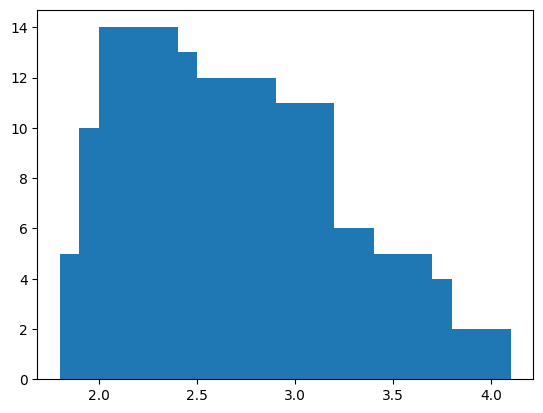

In [11]:
import matplotlib.pyplot as plt
cats_bwt_cnt=cats['Bwt'].value_counts(sort=False)
plt.bar(cats_bwt_cnt.index, cats_bwt_cnt.values, width=0.4)

# paired t test

In [12]:
data = {'before':[7,3,4,5,2,1,6,6,5,4],
       'after':[8,4,5,6,2,3,6,8,6,5]}
df = pd.DataFrame(data)
df

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


In [14]:
for col in df.columns:
    print(col)
    print(shapiro(df[col]))

before
ShapiroResult(statistic=0.9644595384597778, pvalue=0.8352707624435425)
after
ShapiroResult(statistic=0.9456837177276611, pvalue=0.6177994012832642)


In [15]:
stats.ttest_rel(data['after'], data['before'], alternative='greater')

Ttest_relResult(statistic=4.743416490252569, pvalue=0.0005269356285082765)

# 독립표본 ttest

In [17]:
female = cats.loc[cats['Sex']=='F', 'Bwt']
male = cats.loc[cats['Sex']=='M', 'Bwt']

print('female :', shapiro(female))
print('male :', shapiro(male))

female : ShapiroResult(statistic=0.8909613490104675, pvalue=0.0003754299250431359)
male : ShapiroResult(statistic=0.9788321852684021, pvalue=0.11895745247602463)


In [16]:

stats.levene(female, male)

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [21]:
stats.ttest_ind(female, male, alternative='two-sided')

Ttest_indResult(statistic=-7.330666826537409, pvalue=1.590445378625505e-11)

In [23]:
female_cnt = female.value_counts(sort=False)
male_cnt = male.value_counts(sort=False)

# 분산분석(ANOVA)

In [41]:
iris_data = pd.read_csv('../data/iris.csv')
iris_data.head(10)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [42]:
iris_data.target.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [43]:
iris = iris_data.copy()
iris.target.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: target, dtype: int64

In [57]:
setosa = iris.loc[ iris['target'] == 'Iris-setosa', 'sepal width']
virginica = iris.loc[iris['target'] == 'Iris-virginica', 'sepal width']
versicolor = iris.loc[iris['target'] == 'Iris-versicolor', 'sepal width']

<AxesSubplot:xlabel='target', ylabel='sepal width'>

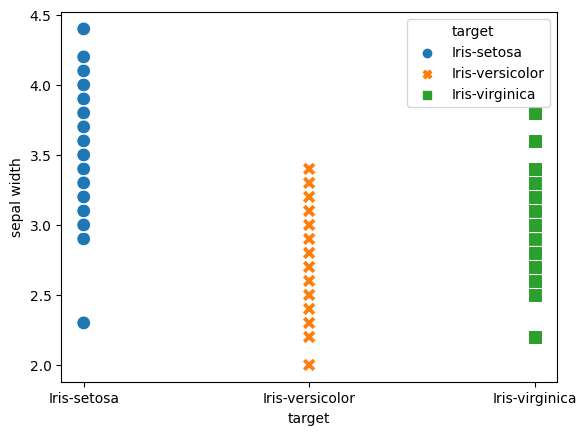

In [50]:
import seaborn as sns
sns.scatterplot(x='target',
               y = 'sepal width', 
               data=iris,
               hue='target', style='target', s=100)

In [53]:
setosa

Series([], Name: sepal width, dtype: float64)

In [59]:
print(shapiro(setosa))
print(shapiro(versicolor))
print(shapiro(virginica))

ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427)
ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)
ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896)


In [60]:
stats.levene(setosa, versicolor, virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

In [61]:
stats.f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

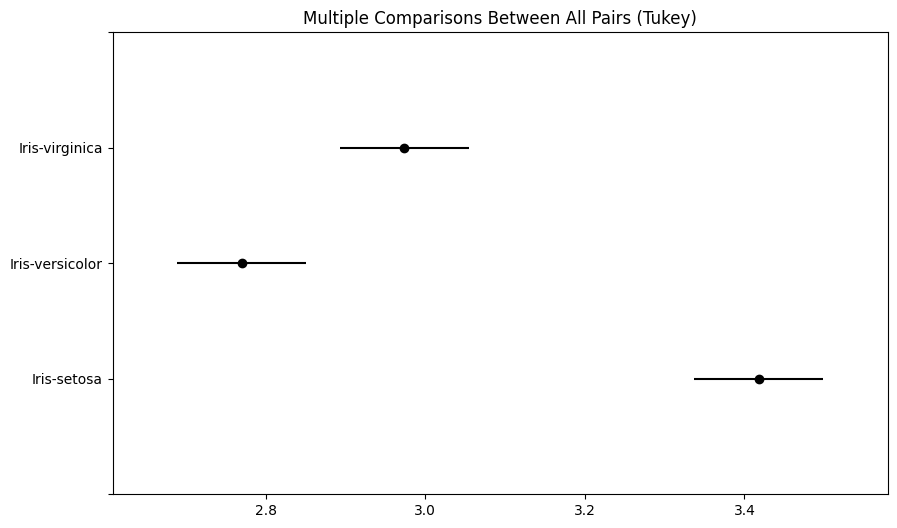

In [63]:
# 사후검정

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data=iris['sepal width'], groups=iris['target'])
tukeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tukeyhsd.plot_simultaneous()

In [64]:
tukeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.0428,0.3652,True


In [65]:
stats.kruskal(setosa, versicolor, virginica)

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

In [67]:
import pingouin as pg
pg.welch_anova(data=iris, dv='sepal width', between='target')

C:\Users\82103\anaconda3\envs\ADP\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,97.369597,43.303381,3.519723e-14,0.391881


C:\Users\82103\anaconda3\envs\ADP\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
C:\Users\82103\anaconda3\envs\ADP\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.5, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


# two way ANOVA

In [68]:
mtcars = pd.read_csv('../data/mtcars.csv')
mtcars

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [69]:
mtcars = mtcars[['mpg', 'am', 'cyl']]
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   am      32 non-null     int64  
 2   cyl     32 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 896.0 bytes


In [71]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'mpg ~ C(cyl) + C(am) + C(cyl):C(am)'
model = ols(formula, mtcars).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(cyl),456.400921,2.0,24.819011,9.354735e-07
C(am),36.766919,1.0,3.998759,5.608373e-02
C(cyl):C(am),25.436511,2.0,1.383233,2.686140e-01
Residual,239.059167,26.0,NaN,NaN


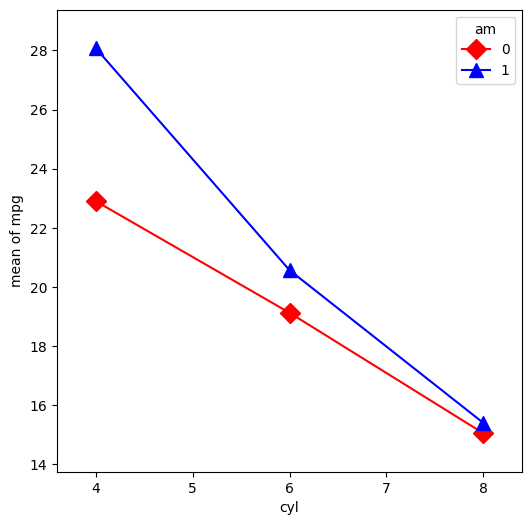

In [73]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
fit = interaction_plot(mtcars['cyl'], mtcars['am'], mtcars['mpg'],
                      colors=['red', 'blue'], markers=['D', '^'], ms=10, ax=ax)
plt.show()

# 교차분석 (카이제곱 검정)

In [91]:
df = pd.read_csv('../data/titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB


In [92]:
table = df.loc[df['survived']==1, 'sex'].value_counts()
table

female    233
male      109
Name: sex, dtype: int64

In [93]:
observed=table
expected=[table.sum()/2, table.sum()/2]

from scipy.stats import chisquare
chi = chisquare(f_obs=observed, f_exp=expected)
print('<적합도 검정> \n', chi)

<적합도 검정> 
 Power_divergenceResult(statistic=44.95906432748538, pvalue=2.0119672574477235e-11)


## 카이제곱 - 독립성 검정

In [94]:
table = pd.crosstab(df['class'], df['survived'])
table

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


In [95]:
from scipy.stats import chi2_contingency
chi, p, deg, expect = chi2_contingency(table)
print('Statistic :', chi)
print('p-value :', p)
print('degree of freedom :', deg)
print('expect :\n', expect)

Statistic : 102.88898875696056
p-value : 4.549251711298793e-23
degree of freedom : 2
expect :
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


In [96]:
pd.DataFrame(expect, index=table.index, columns=table.columns)

survived,0,1
class,,
First,133.090909,82.909091
Second,113.373737,70.626263
Third,302.535354,188.464646


In [97]:
table2 = pd.crosstab(df['sex'], df['survived'])
table2

survived,0,1
sex,,
female,81,233
male,468,109


In [98]:
chi, p, deg, expect = chi2_contingency(table2)

In [100]:
print('Statistic :', chi)
print('p-value :', p)
print('degree of freedom :', deg)
print('expect :\n', expect)

Statistic : 260.71702016732104
p-value : 1.1973570627755645e-58
degree of freedom : 1
expect :
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


In [102]:
import numpy as np

house = pd.read_csv('../data/kc_house_data.csv')
house = house[['price', 'sqft_living']]
house.corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


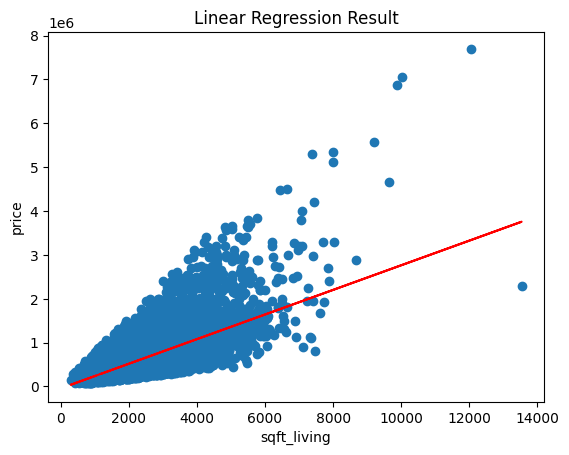

In [116]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

y = house['price']
X = house[['sqft_living']]

lr = ols('price ~ sqft_living', data=house).fit()
y_pred = lr.predict(X)

# visualization
plt.scatter(X, y) # 원 데이터 산포도
plt.plot(X, y_pred, color='red')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Linear Regression Result')
plt.show()


In [117]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:40:55   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 다중공선성`

In [118]:
cars = pd.read_csv('../data/Cars93.csv')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [119]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ols 모델의 formula를 정의할 떄 파라미터 값으로 특수문자 불가
cars.columns = cars.columns.str.replace('.', '')
model = smf.ols(formula='Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway', data=cars)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.14
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           4.88e-14
Time:                        14:48:20   Log-Likelihood:                -302.94
No. Observations:                  93   AIC:                             619.9
Df Residuals:                      86   BIC:                             637.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.2157     17.812     -1.809      0.074     -67.625       3.193
EngineSize     4.4732      1.410      3.172      0.002       1.670       7.276
RPM            0.0071      0.001      5.138      0.000       0.004       0.010
Weight         0.0056      0.003      1.634      0.106      -0.001       0.012
Length        -0.0464      0.094     -0.496      0.621      -0.232       0.139
MPGcity       -0.3478      0.448     -0.776      0.440      -1.239       0.544
MPGhighway     0.0582      0.460      0.126      0.900      -0.856       0.973
==============================================================================
Omnibus:                       62.984   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.289
Skew:                           2.074   Prob(JB):                     5.89e-84
Kurtosis:                      12.039   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
correlation_matrix=cars[['EngineSize', 'RPM', 'Weight', 'Length', 'MPGcity', 'MPGhighway']].corr()

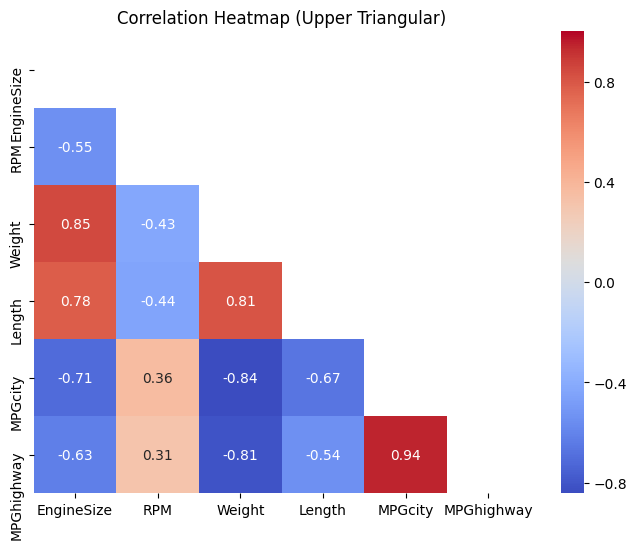

In [128]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation Heatmap (Upper Triangular)')
plt.show()

array([1.00e+00, 3.20e+00, 5.50e+03, 3.56e+03, 1.95e+02, 1.80e+01,
       2.50e+01])

In [142]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway',
                data = cars, 
                return_type = 'dataframe')

vif_list = []
for i in range(1, len(X.columns)):
    vif_list.append([variance_inflation_factor(X.values, i), X.columns[i]])
    
pd.DataFrame(vif_list, columns=['vif', 'variable'])

,vif,variable
0,4.605118,EngineSize
1,1.446859,RPM
2,8.685973,Weight
3,4.013002,Length
4,13.668288,MPGcity
5,12.943133,MPGhighway


In [144]:
model = smf.ols(formula = 'Price ~ EngineSize + RPM + Weight + Length + MPGhighway', data=cars)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     22.95
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           1.28e-14
Time:                        15:01:36   Log-Likelihood:                -303.27
No. Observations:                  93   AIC:                             618.5
Df Residuals:                      87   BIC:                             633.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.8122     17.158     -2.087      0.040     -69.916      -1.709
EngineSize     4.6591      1.386      3.361      0.001       1.904       7.415
RPM            0.0071      0.001      5.173      0.000       0.004       0.010
Weight         0.0053      0.003      1.567      0.121      -0.001       0.012
Length        -0.0194      0.087     -0.224      0.823      -0.191       0.153
MPGhighway    -0.2500      0.231     -1.082      0.282      -0.709       0.209
==============================================================================
Omnibus:                       61.903   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.806
Skew:                           2.044   Prob(JB):                     1.00e-79
Kurtosis:                      11.785   Cond. No.                     1.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:
import time
import itertools
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
# 전진선택법
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['Intercept']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y,            feature_set=predictors+[p]+['Intercept']))
        
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in")
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0].aic )
    return best_model


In [160]:
# 후진소거법
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) -1):
        results.append(processSubset(X=X, y= y,        feature_set = list(combo)+['Intercept']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on",          len(predictors) -1, "predictors in", (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,         'AIC:',best_model[0].aic )

    return best_model


In [163]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['Intercept'])['AIC']

    for i in range(1, len(X.columns.difference(['Intercept'])) +1):
        Forward_result = forward(X=X, y=y, predictors=predictors) 
        print('\n ======= ')
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        Backward_result = backward(X=X, y=y, predictors=predictors)

        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k !='Intercept']
            print('\n ======= ')
            print('backward')

        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return (Stepmodels['model'][len(Stepmodels['model'])])


In [164]:
Stepwise_best_model = Stepwise_model(X=X, y=y)

Processed  6 models on 1 predictors in
Selected predictors: ['Weight', 'Intercept']  AIC: 638.2790669305498

forward
Processed  1 models on 0 predictors in 0.004002571105957031
Selected predictors: ['Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002689FD03470>
Processed  5 models on 2 predictors in
Selected predictors: ['Weight', 'RPM', 'Intercept']  AIC: 624.5241529342444

forward
Processed  2 models on 1 predictors in 0.006000041961669922
Selected predictors: ['Weight', 'Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002689FD03B70>
Processed  4 models on 3 predictors in
Selected predictors: ['Weight', 'RPM', 'EngineSize', 'Intercept']  AIC: 616.0976497740975

forward
Processed  3 models on 2 predictors in 0.005001544952392578
Selected predictors: ['Weight', 'RPM', 'Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002689FD03CC0>
Processed  3 model

In [165]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           6.75e-16
Time:                        15:23:23   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
Intercept    -51.7933      9.106     -5.688      0.000     -69.887     -33.699
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     8.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 군집분석

In [167]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

US = pd.read_csv('../data/USArrests.csv')

US.columns = ['State', 'Murder', 'Assault', 'UrbanPop', 'Rape']
label_list = US.State.tolist()
US.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


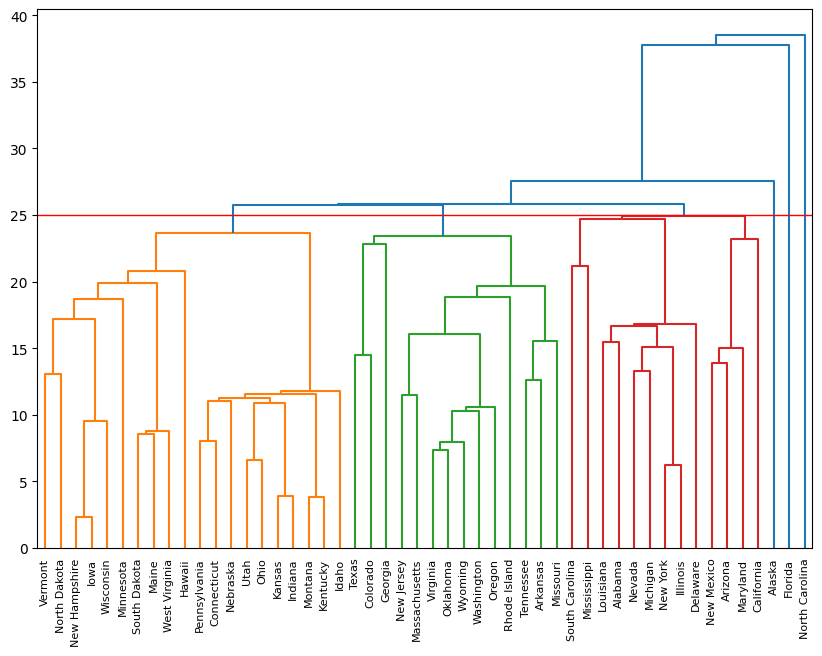

In [173]:
# 최단 연결법
single = linkage(US.iloc[:, 1::], metric = 'euclidean', method='single')

plt.figure(figsize=(10, 7))
dendrogram(single,
          orientation='top',
          labels=label_list,
          distance_sort='descending',
          color_threshold=25,
          show_leaf_counts=True)

plt.axhline(y=25, color='r', linewidth=1)
plt.show()

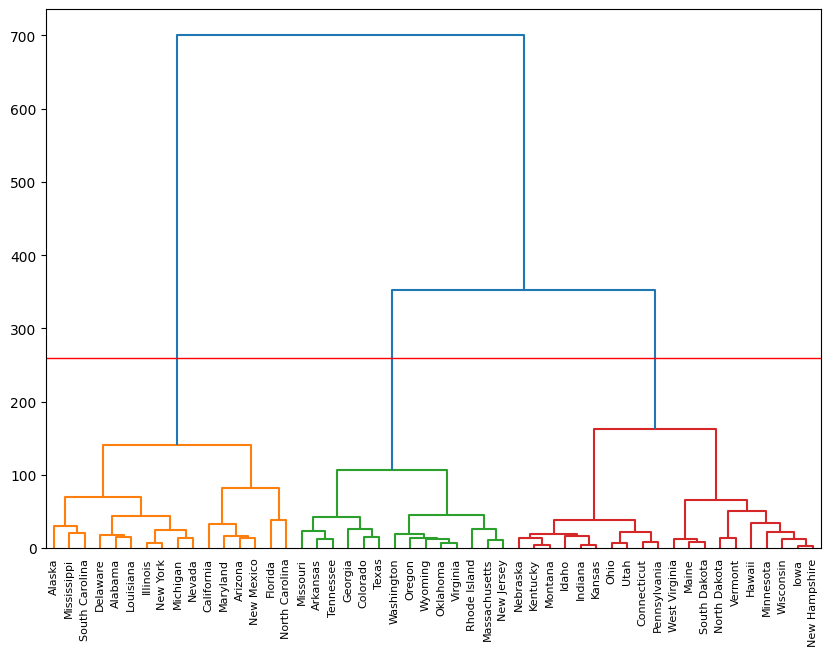

In [176]:
# 와드
ward = linkage(US.iloc[:, 1::], method='ward', metric='euclidean')

plt.figure(figsize=(10, 7))
dendrogram(ward,
          orientation='top',
          labels=label_list,
          color_threshold=250,
          show_leaf_counts=True)
plt.axhline(y=259, color='r', linewidth=1)
plt.show()

In [177]:
assignments = fcluster(ward, 250, 'distance')
assignments

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [179]:
US['cluster'] = assignments
US.groupby('cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000


## 비계층적 군집분석 - kmeans

In [181]:
iris = pd.read_csv('../data/iris.csv')
X = iris.drop('target', axis=1)
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [183]:
from sklearn.cluster import KMeans
from sklearn.metrics import  calinski_harabasz_score
for k in range(2, 10):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    print(calinski_harabasz_score(X, labels))

513.3038433517568
560.3999242466402
529.3982941434156
493.797689822402
474.85419152314864
449.23727032407174
435.6588533945912
403.43595475014206


680.8243999999996
152.36870647733915
78.94084142614601
57.317873214285726
46.56163015873017
38.930963049671746
34.299985543844244
30.290983238178892
28.4983205272988
26.185759370015955


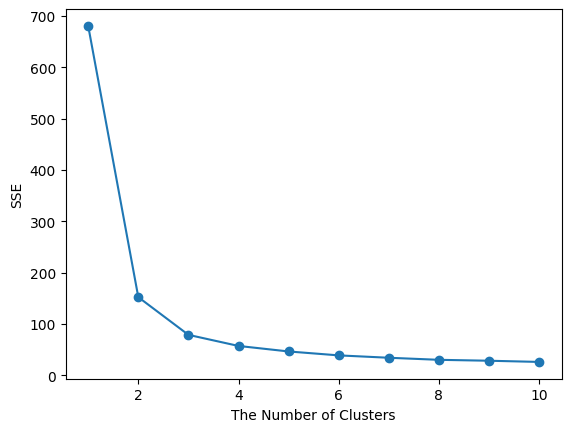

In [186]:
def elbow(X):
    sse = []
    for i in range(1, 11):
        km=KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        print(km.inertia_)
        sse.append(km.inertia_)
    
    plt.plot(range(1, 11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show
    
elbow(X)

In [188]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

new_labels = km.labels_
iris['cluster'] = new_labels

iris.groupby('cluster').mean()

,sepal length,sepal width,petal length,petal width
cluster,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


In [190]:
iris.groupby('cluster')['target'].value_counts()

cluster  target         
0        Iris-versicolor    48
         Iris-virginica     14
1        Iris-setosa        50
2        Iris-virginica     36
         Iris-versicolor     2
Name: target, dtype: int64

In [195]:

# k-means 시각화 
# 군집결과 시각화
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(iris,
             diag_kind='kde',
             hue="cluster", 
             corner =True,  
             palette='bright')
plt.show()


TypeError: pairplot() got an unexpected keyword argument 'corner'

In [196]:
sns.__version__

'0.9.0'

In [197]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

iris = pd.read_csv('../data/iris.csv')
df = iris.drop('target', axis=1)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

gmm = GaussianMixture(n_components = 3)
gmm.fit(df_scaled)
gmm_labels = gmm.predict(df_scaled)
gmm_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [198]:
df['gmm_cluster'] = gmm_labels

cluster = [0, 1, 2]
df.groupby('gmm_cluster').mean()

,sepal length,sepal width,petal length,petal width
gmm_cluster,,,,
0,6.554545,2.950909,5.489091,1.989091
1,5.006000,3.418000,1.464000,0.244000
2,5.904444,2.775556,4.193333,1.293333


In [206]:
df

,sepal length,sepal width,petal length,petal width,gmm_cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


TypeError: pairplot() got an unexpected keyword argument 'corner'

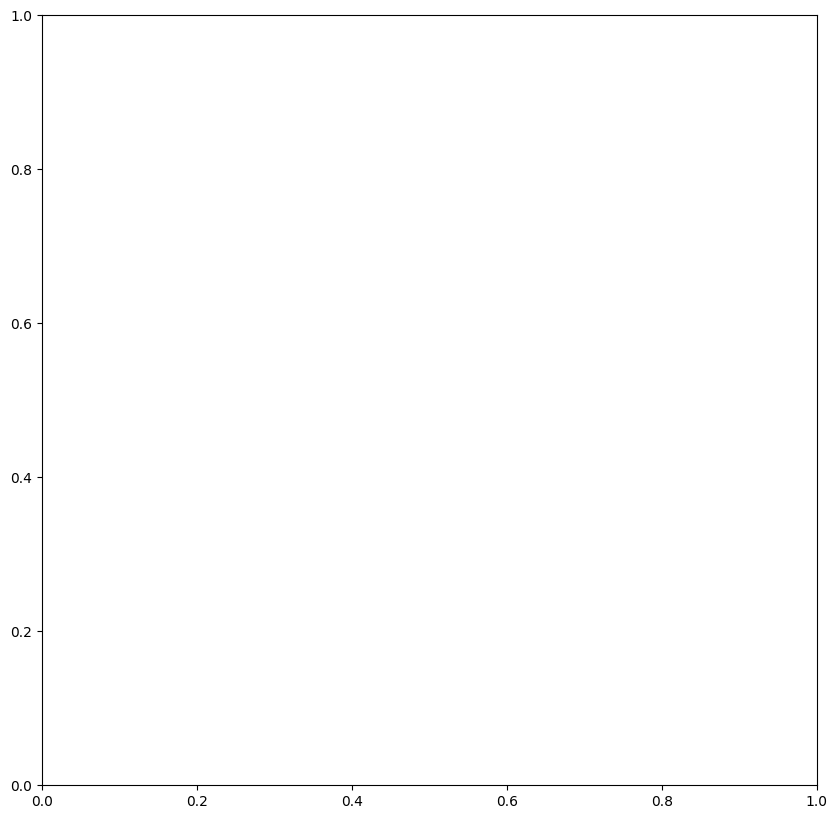

In [216]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.pairplot(df,
            hue='gmm_cluster',
            corner=True)
plt.show()